## Empresa de Automóveis

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('vendas_automoveis_2024.csv')

In [3]:
df.head(5)

,ID_Venda,Marca,Modelo,Ano,Preço,Quantidade,Data_Venda
0,1,Hyundai,Corolla,2024,95000.000000,3,2024-03-23
1,2,Toyota,HB20,2024,109256.465517,2,2024-01-21
2,3,Honda,X1,2022,85000.000000,2,2024-02-28
3,4,Volkswagen,X1,2024,120000.000000,2,2024-12-12
4,5,Hyundai,Corolla,2024,120000.000000,5,2024-04-02


### Verificar Duplicatas

In [4]:
# Verificar se há duplicatas na coluna 'ID_Venda'
duplicatas = df['ID_Venda'].duplicated().sum()

# Mostrar o número de duplicatas
print(f"Número de duplicatas encontradas: {duplicatas}")

Número de duplicatas encontradas: 0


### Tratar Valores Ausentes da Coluna 'Marca'

In [5]:
# Preencher os valores ausentes na coluna 'Marca' com a string 'Desconhecido'
df['Marca'] = df['Marca'].fillna('Desconhecido')

### Tratar Valores Ausentes da Coluna 'Modelo'

In [6]:
df['Modelo'] = df['Modelo'].fillna('Desconhecido')

### Tratar Valores Ausentes da Coluna 'Preco'

In [7]:
# Preencher os valores ausentes na coluna 'Preço' com a média dos preços
media_preco = df['Preço'].mean()  
df['Preço'] = df['Preço'].fillna(media_preco)

# Exibir os dados após o preenchimento
df.head()

,ID_Venda,Marca,Modelo,Ano,Preço,Quantidade,Data_Venda
0,1,Hyundai,Corolla,2024,95000.000000,3,2024-03-23
1,2,Toyota,HB20,2024,109256.465517,2,2024-01-21
2,3,Honda,X1,2022,85000.000000,2,2024-02-28
3,4,Volkswagen,X1,2024,120000.000000,2,2024-12-12
4,5,Hyundai,Corolla,2024,120000.000000,5,2024-04-02


## 1. Distribuições Estatísticas

### Visualização das distribuições

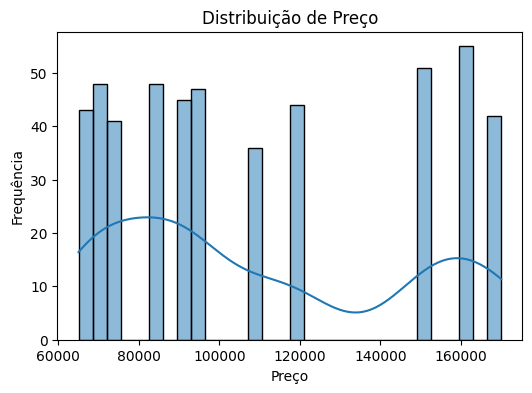

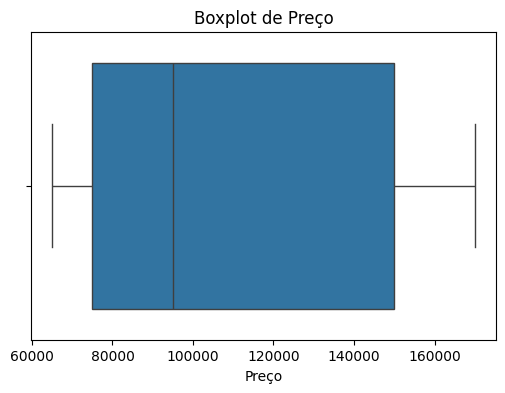

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotar histograma da coluna 'Preço'
plt.figure(figsize=(6,4))
sns.histplot(df['Preço'], kde=True, bins=30)
plt.title('Distribuição de Preço')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()

# Boxplot da coluna 'Preço'
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Preço'])
plt.title('Boxplot de Preço')
plt.xlabel('Preço')
plt.show()

### Cálculo de medidas estatísticas

In [9]:
# Estatísticas descritivas para a coluna 'Preço'
preco_stats = df['Preço'].describe()
print(preco_stats)

# Cálculo de assimetria e curtose
from scipy.stats import skew, kurtosis

preco_skew = skew(df['Preço'].dropna())  # Remover valores ausentes
preco_kurt = kurtosis(df['Preço'].dropna())

print(f'Assimetria: {preco_skew}')
print(f'Curtose: {preco_kurt}')

count       500.000000
mean     109256.465517
std       36011.534575
min       65000.000000
25%       75000.000000
50%       95000.000000
75%      150000.000000
max      170000.000000
Name: Preço, dtype: float64
Assimetria: 0.45883120371494307
Curtose: -1.2833289982451341


## 2. Regressão Linear

### Preparar os dados para a regressão linear

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecionar as variáveis independentes (X) e dependente (y)
X = df[['Ano', 'Quantidade']]  # Variáveis independentes
y = df['Preço']  # Variável dependente (target)

# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

# Coeficientes do modelo
print(f'Coeficientes: {model.coef_}')
print(f'Intercepto: {model.intercept_}')

Mean Squared Error (MSE): 1395108733.630675
R-squared (R2): 0.004510411227892197
Coeficientes: [1941.04929752 -614.08483694]
Intercepto: -3815859.1768064024


### Visualizar os resultados da regressão

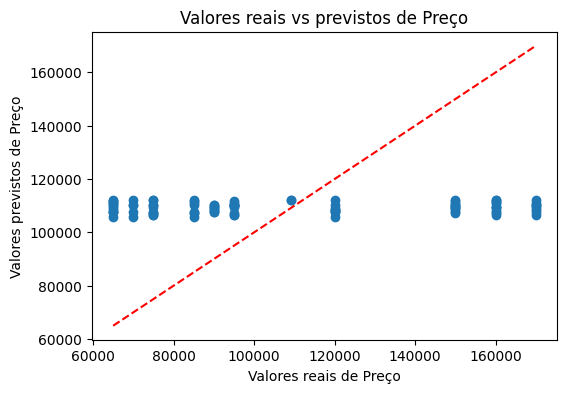

In [11]:
# Plotando os valores reais vs previstos
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Valores reais vs previstos de Preço')
plt.xlabel('Valores reais de Preço')
plt.ylabel('Valores previstos de Preço')
plt.show()

## 3. Testes de Hipóteses

### Teste t de Student (para comparar as médias entre dois grupos)

In [12]:
from scipy.stats import ttest_ind

# Filtrar dados para Ford e Toyota
ford_preco = df[df['Marca'] == 'Ford']['Preço']
toyota_preco = df[df['Marca'] == 'Toyota']['Preço']

# Realizar o teste t
t_stat, p_value = ttest_ind(ford_preco, toyota_preco, nan_policy='omit')

print(f'Estatística t: {t_stat}')
print(f'Valor-p: {p_value}')

# Interpretando o resultado
if p_value < 0.05:
    print('Rejeitamos a hipótese nula. A média dos preços é significativamente diferente entre Ford e Toyota.')
else:
    print('Não rejeitamos a hipótese nula. Não há diferença significativa entre os preços de Ford e Toyota.')

Estatística t: -0.7841519741029062
Valor-p: 0.43463628350716854
Não rejeitamos a hipótese nula. Não há diferença significativa entre os preços de Ford e Toyota.


### Teste de correlação de Pearson (para verificar a relação entre duas variáveis contínuas)

In [13]:
from scipy.stats import pearsonr

# Teste de correlação de Pearson entre 'Preço' e 'Quantidade'
correlation, p_value = pearsonr(df['Preço'].dropna(), df['Quantidade'].dropna())  # Remover NaNs

print(f'Correlação de Pearson: {correlation}')
print(f'Valor-p: {p_value}')

# Interpretando o resultado
if p_value < 0.05:
    print('Existe uma correlação significativa entre preço e quantidade.')
else:
    print('Não existe correlação significativa entre preço e quantidade.')

Correlação de Pearson: -0.015231366363874198
Valor-p: 0.7340440701577977
Não existe correlação significativa entre preço e quantidade.


### ANOVA (para comparar as médias de mais de dois grupos)

In [14]:
from scipy.stats import f_oneway

# Realizar a ANOVA para as marcas
marcas = df['Marca'].unique()
precos_por_marca = [df[df['Marca'] == marca]['Preço'] for marca in marcas]

# Teste de ANOVA
f_stat, p_value = f_oneway(*precos_por_marca)

print(f'Estatística F: {f_stat}')
print(f'Valor-p: {p_value}')

# Interpretando o resultado
if p_value < 0.05:
    print('Rejeitamos a hipótese nula. Existe uma diferença significativa no preço entre as marcas.')
else:
    print('Não rejeitamos a hipótese nula. Não há diferença significativa no preço entre as marcas.')

Estatística F: 1.2105655016335752
Valor-p: 0.28134867874655234
Não rejeitamos a hipótese nula. Não há diferença significativa no preço entre as marcas.


In [15]:
# Salvar o dataset
df.to_csv('vendas_automoveis_2024.csv', index = False)